<h1 style='color:Navy' align='center'>Data Science Regression Project: Predicting Insurance cost </h1>

<h2 style='color:blue'>Data Load: Load Insurance data into a DataFrame</h2>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib 
import warnings
warnings.filterwarnings('ignore')

In [138]:
df1 = pd.read_csv('insurance.csv')
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3 style='color:blue'>Data cleaning..</h3>

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
df1.shape

(1338, 7)

In [32]:
df1[df1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [33]:
df1 = df1.drop_duplicates( keep='last')

In [34]:
df1.shape

(1337, 7)

In [35]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<h3 style='color:blue'>Feature engineering</h3>

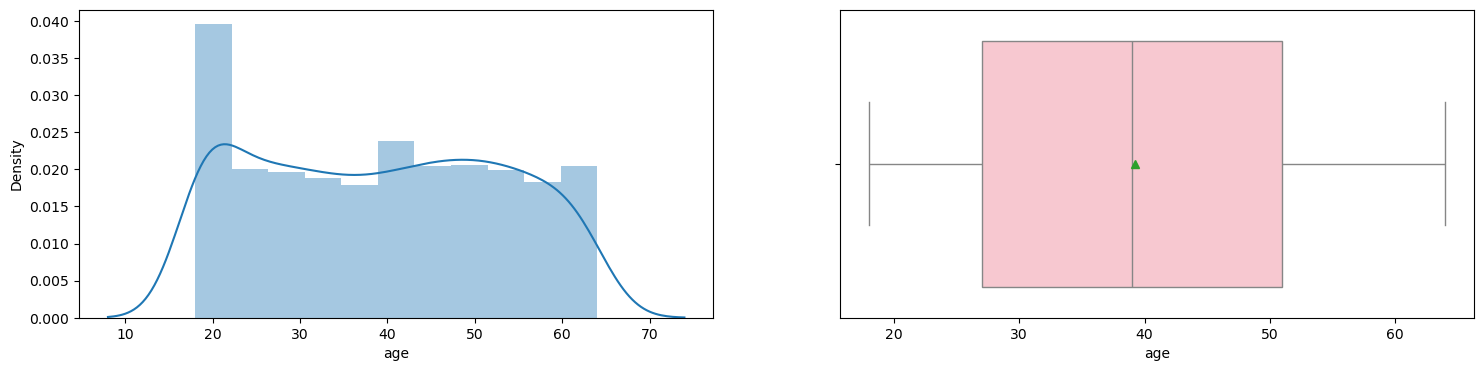

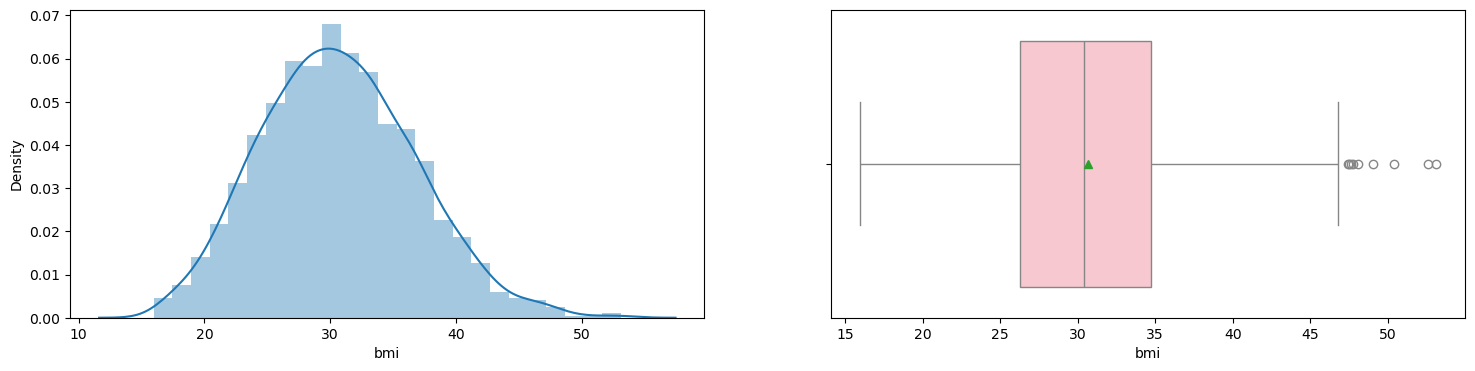

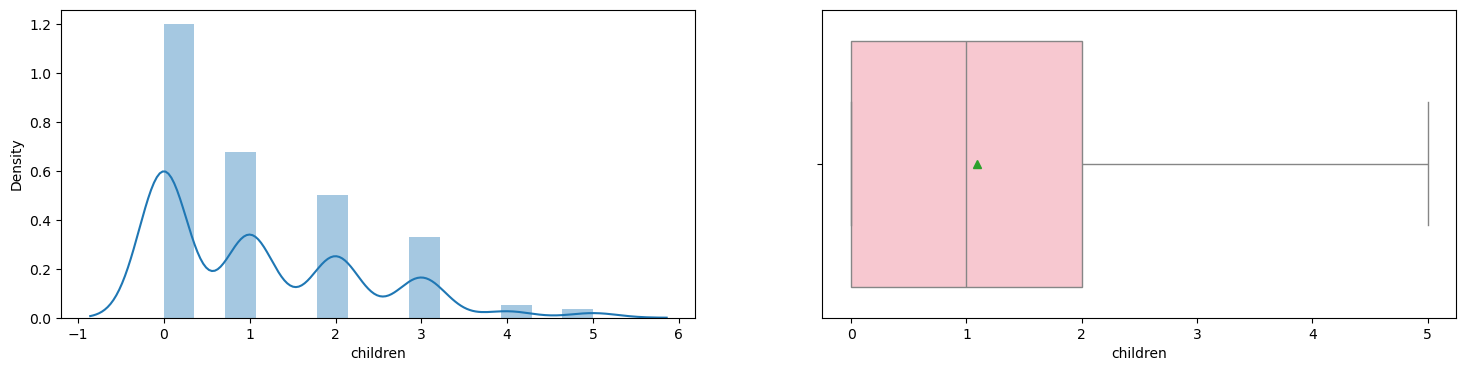

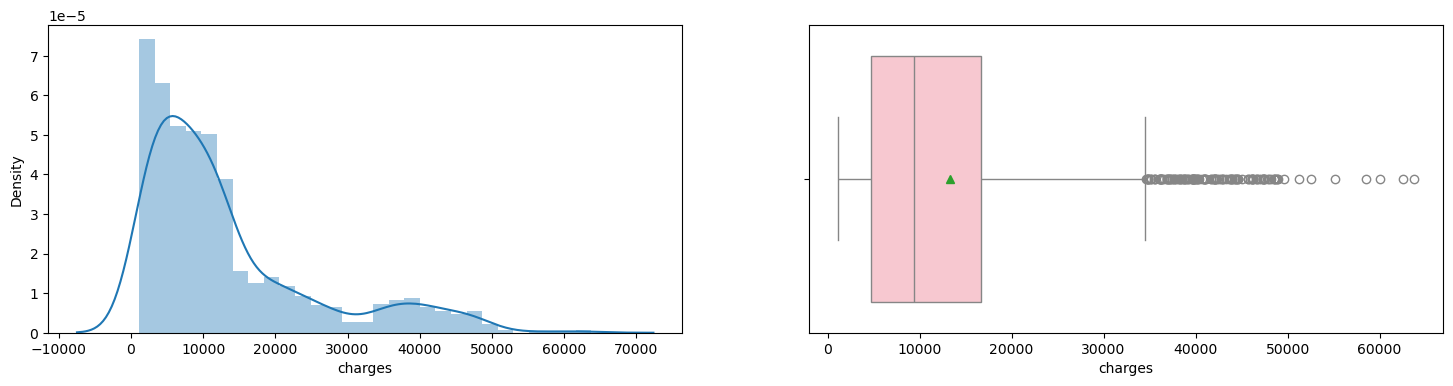

In [67]:
x_axis=['age', 'bmi', 'children', 'charges']

for x in x_axis:
    fig, axes = plt.subplots(1,2, figsize=(18,4))
    sns.distplot(df1[x], ax=axes[0], kde=True)    
    sns.boxplot(df1[x], orient="h", showmeans=True,color='pink')

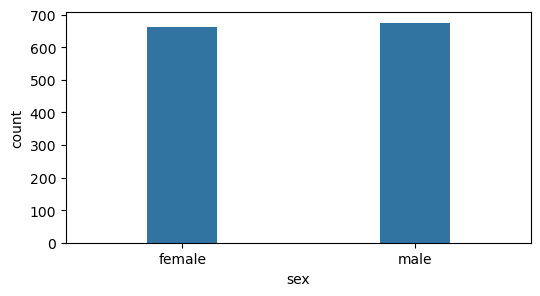

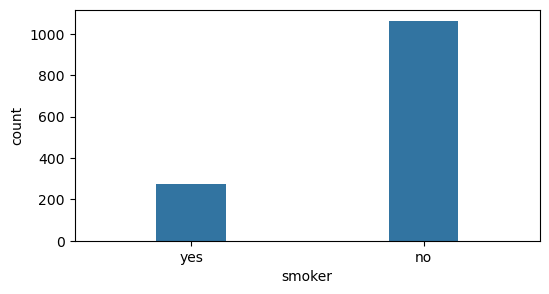

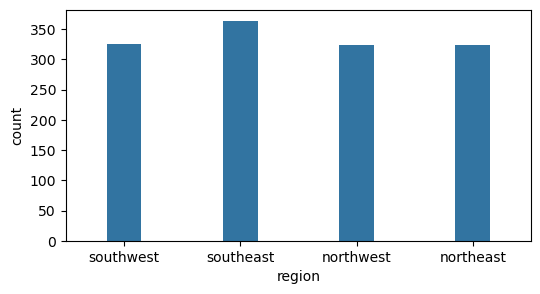

In [85]:
x_axis=['sex', 'smoker', 'region']

for x in x_axis:
    fig, axes = plt.subplots(1, figsize=(6,3))
    sns.countplot(df1, x=df1[x],width=.3,)

In [100]:
df_corr = df1[['age','bmi','children','charges']]
correlation = df_corr.corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

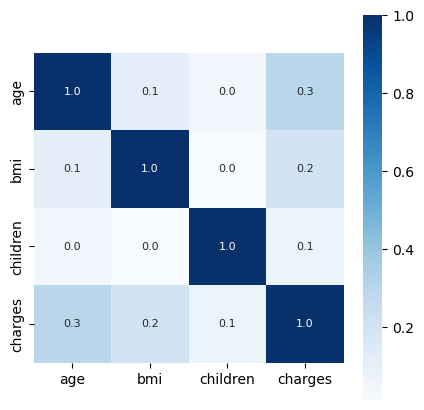

In [101]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [89]:
df1.sex.unique()

array(['female', 'male'], dtype=object)

In [90]:
df2 = df1.copy()
df2['sex']=df2.sex.map({'female':0,'male':1})

In [91]:
df2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [92]:
df2.smoker.unique()

array(['yes', 'no'], dtype=object)

In [93]:
df2['region']=df2.region.map({'southwest':0,'southeast':1, 'northwest':2, 'northeast':3})
df2['smoker']=df2.smoker.map({'no':0,'yes':1})

In [94]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


<h3 style='color:blue'>Model building</h3>

In [103]:
from sklearn.model_selection import train_test_split

X = df2.drop('charges',axis=1)
y = df2.charges

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=.2, random_state=2025
)

In [104]:
X_train.shape

(1069, 6)

In [105]:
X_test.shape

(268, 6)

In [106]:
y_train.shape

(1069,)

In [107]:
y_test.shape

(268,)

In [108]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7564862099958225

<h3 style='color:blue'>Hyper parameter tuning and choosing best model</h3>

In [109]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75214032, 0.77414461, 0.7924388 , 0.73071822, 0.8038815 ])

In [113]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [123]:
model_params = {
    'SVR' : {
        'model': SVR(),
        'params':{
            'C': [1,5,10],
            'kernel' : ['linear', 'rbf']
        }
    },

    'DecisionTreeRegressor':{
        'model': DecisionTreeRegressor(),
        'params':{
            'max_depth': [10,20],
            'criterion': ['absolute_error','friedman_mse']
        }
    },

    'RandomForestRegressor':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators': [1,10,100],
            'criterion': ['absolute_error', 'squared_error']
        }
    },

}

In [124]:
from sklearn.model_selection import GridSearchCV

scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

bestmodel_df = pd.DataFrame(scores)

In [125]:
bestmodel_df

,model,best_score,best_params
0,SVR,-0.022370,"{'C': 10, 'kernel': 'linear'}"
1,DecisionTreeRegressor,0.744686,"{'criterion': 'absolute_error', 'max_depth': 10}"
2,RandomForestRegressor,0.826965,"{'criterion': 'squared_error', 'n_estimators':..."


<h3 style='color:blue'>Chose RandomForestRegressor as best model</h3>

In [126]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8530930860852528

<h3 style='color:blue'>Testing the model using a dummy data</h3>

In [127]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [128]:
test_df = pd.DataFrame([{'age':45, 'sex':1, 'bmi':30,'children':3, 'smoker':1, 'region':3}])
test_df

,age,sex,bmi,children,smoker,region
0,45,1,30,3,1,3


In [129]:
model.predict(test_df)

array([33284.7088944])

<h3 style='color:blue'>Save the model</h3>

In [130]:
# import joblib

In [131]:
# joblib.dump(rf_model,"insurance_model.h5")

In [132]:
import pickle

pickle.dump(model , open('insurance-model-rf.pk1' , 'wb'))

In [133]:
loaded_model = pickle.load(open('insurance-model-rf.pk1' , 'rb'))

In [134]:
loaded_model.predict(test_df)

array([33284.7088944])

In [135]:
# import sklearn
# print('The scikit-learn version is {}.'.format(sklearn.__version__))